In [43]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from sklearn.model_selection import ParameterGrid
from tqdm import tqdm
import re


In [3]:
# import the data
path = 'C:/Users/20202201/Documents/Uni/Master/Year2/Semester 1/Natural Language Processing/NLP/Assignment-1/Dataset/assignment-2-data.csv'
df_cleaned = pd.read_csv(path)

df_cleaned['new_tokenized'] = df_cleaned['clean_content'].apply(lambda x: x.split())

df_cleaned.head(5)

,id,ticker,title,category,content,release_date,provider,url,article_id,Date,Open,Close,clean_content,label,tokenized_content,new_tokenized
0,221539,NIO,A Central Bank War Just Started And Its Good F...,opinion,ECB Effects\nThe move in the euro was huge fa...,2019-03-07,Michael Kramer,https://www.investing.com/analysis/a-central-b...,200395687,2019-03-07,3.77750,3.73150,ecb effect move euro huge falling pip huge imp...,0,"['ecb', 'effect', 'move', 'euro', 'huge', 'fal...","[ecb, effect, move, euro, huge, falling, pip, ..."
1,221547,NIO,6 Stocks To Watch Nivida Could Be Falling,opinion,6 Stocks To Watch March 6 Trading Session\nSt...,2019-03-06,Michael Kramer,https://www.investing.com/analysis/6-stocks-to...,200394931,2019-03-06,3.90400,3.80125,stock watch march trading session stock stock ...,0,"['stock', 'watch', 'march', 'trading', 'sessio...","[stock, watch, march, trading, session, stock,..."
2,221572,NIO,Stocks Dow Drops Nearly 400 Points as Apple ...,news,Investing com A rout in Apple and Facebook ...,2018-11-19,Investing.com,https://www.investing.com/news/stock-market-ne...,1694042,2018-11-19,4.04475,3.61750,investing com rout apple facebook nasdaq fb mo...,0,"['investing', 'com', 'rout', 'apple', 'faceboo...","[investing, com, rout, apple, facebook, nasdaq..."
3,221597,UBER,The Best Of CES 2020 Revised,opinion,With 4 500 companies bringing their innovation...,2020-01-16,Zacks Investment Research,https://www.investing.com/analysis/the-best-of...,200499164,2020-01-16,6.19300,6.22325,company bringing innovation ce jan get really ...,1,"['company', 'bringing', 'innovation', 'ce', 'j...","[company, bringing, innovation, ce, jan, get, ..."
4,221614,UBER,The Best Of CES 2020,opinion,With 4 500 companies bringing their innovation...,2020-01-10,Zacks Investment Research,https://www.investing.com/analysis/the-best-of...,200498063,2020-01-10,6.18325,6.10800,company bringing innovation ce jan get really ...,0,"['company', 'bringing', 'innovation', 'ce', 'j...","[company, bringing, innovation, ce, jan, get, ..."


## Iteration 1

In [4]:
#data
processed_texts = df_cleaned['new_tokenized'].head(5)

# create dictionary
id2word = corpora.Dictionary(df_cleaned['new_tokenized'])

# create corpus
text = df_cleaned['new_tokenized']

# Term Document Frequency
corpus = [id2word.doc2bow(text1) for text1 in text]

##### Now I used the original code from the lecture with 3 topics

In [47]:
# Build LDA model
lda_model1 = LdaModel(corpus=corpus, 
                     id2word=id2word, 
                     num_topics=3, 
                     random_state=2065721, 
                     passes=5, 
                     alpha='auto', 
                     per_word_topics=True,
                     update_every=1)

In [49]:
# get the perplexity score
print('\nPerplexity: ', lda_model1.log_perplexity(corpus))

# get the coherence score
coherence_model_lda = CoherenceModel(model=lda_model1, texts=text, dictionary=id2word, coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())


Perplexity:  -7.691075675040715

Coherence Score:  0.4361960573171025


In [8]:
# Extract the words for each topic
topics = lda_model1.show_topics(formatted=False)
topic_words = {i: [word for word, _ in words] for i, words in topics}
topic_words

{0: ['year',
  'zacks',
  'company',
  'quarter',
  'earnings',
  'stock',
  'revenue',
  'growth',
  'estimate',
  'share'],
 1: ['company',
  'nasdaq',
  'nvidia',
  'technology',
  'intel',
  'market',
  'chip',
  'new',
  'year',
  'said'],
 2: ['nasdaq',
  'stock',
  'market',
  'nyse',
  'week',
  'day',
  'trade',
  'year',
  'nvidia',
  'index']}

In [9]:
# Evaluate the model
coherence_model_lda = CoherenceModel(model=lda_model1, texts=processed_texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

c:\Users\20202201\Anaconda3_\envs\JADS_NLP\Lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
c:\Users\20202201\Anaconda3_\envs\JADS_NLP\Lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


Coherence Score:  nan


## Iteration 2
#### Brams Iteration 1

In [25]:
# Build LDA model
lda_model2 = LdaModel(corpus=corpus, 
                     id2word=id2word, 
                     num_topics=100, 
                     random_state=2065721, 
                     passes=5, 
                     alpha='auto', 
                     per_word_topics=True,
                     update_every=1)


# get the perplexity score
print('\nPerplexity: ', lda_model2.log_perplexity(corpus))

# get the coherence score
coherence_model_lda = CoherenceModel(model=lda_model2, texts=text, dictionary=id2word, coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())

#get the diversity score
topics = lda_model2.show_topics(formatted=False)
topic_words = {i: [word for word, _ in words] for i, words in topics}
topic_words



c:\Users\20202201\Anaconda3_\envs\JADS_NLP\Lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
c:\Users\20202201\Anaconda3_\envs\JADS_NLP\Lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


Coherence Score:  nan
Divergence Score:  -11533237.863393068


## Iteration 3

In [27]:
# given amount of combinations
numb_topics = [2, 3, 5, 10, 15, 20, 40, 60, 80, 100, 200, 300, 400, 500]


# now run the model for all combinations
results = []

for i in tqdm(range(len(numb_topics))):
    lda_model = LdaModel(corpus=corpus, 
                            id2word=id2word, 
                            num_topics=numb_topics[i], 
                            random_state=2065721, 
                            passes=1, 
                            alpha='auto', 
                            per_word_topics=True,
                            update_every=1)
    
    # Track coherence
    coherence_model_lda = CoherenceModel(model=lda_model, texts=text, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    
    # Track perplexity
    perplexity = lda_model.log_perplexity(corpus)
    
    results.append([numb_topics[i], coherence_lda, perplexity])


100%|██████████| 14/14 [25:23<00:00, 108.82s/it]


Text(0, 0.5, 'Score')

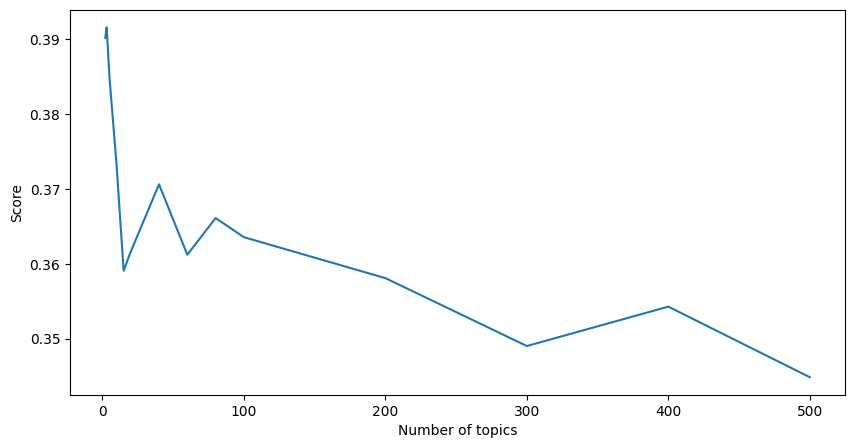

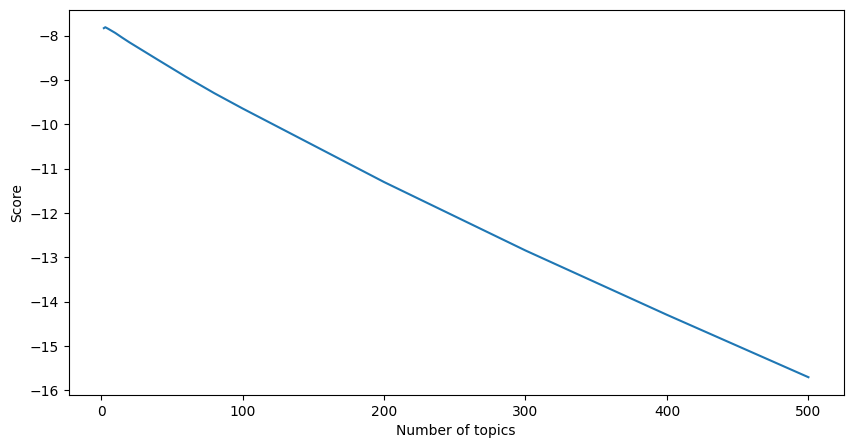

In [41]:
# create a lineplot from results['coherence'] and results['perplexity']
plt.figure(figsize=(10, 5))
plt.plot(results['coherence'], label='Coherence')
plt.xlabel('Number of topics')
plt.ylabel('Score')

plt.figure(figsize=(10, 5))
plt.plot(results['perplexity'], label='Perplexity')
plt.xlabel('Number of topics')
plt.ylabel('Score')



## Iteration 4
#### Brams iteration 2

In [54]:
#clean data again
number_pattern = re.compile(r'.*\d')

text = text.apply(lambda x: [word for word in x if not number_pattern.match(word)])

In [55]:
# Build LDA model
lda_model3 = LdaModel(corpus=corpus, 
                     id2word=id2word, 
                     num_topics=100, 
                     random_state=2065721, 
                     passes=5, 
                     alpha='auto', 
                     per_word_topics=True,
                     update_every=1)


# get the perplexity score
print('\nPerplexity: ', lda_model3.log_perplexity(corpus))

# get the coherence score
coherence_model_lda = CoherenceModel(model=lda_model3, texts=text, dictionary=id2word, coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())



Perplexity:  -9.537245066827204


c:\Users\20202201\Anaconda3_\envs\JADS_NLP\Lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
c:\Users\20202201\Anaconda3_\envs\JADS_NLP\Lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))



Coherence Score:  nan


## Iteration 5
#### Brams iteration 3

In [61]:
# from text, drop words that occur less than 5 times and more than 2000 times

#count how many times each word occurs
word_freq = {id2word[word_id]: freq for word_id, freq in id2word.cfs.items()}
word_freq = pd.Series(word_freq)

#drop words that occur less than 5 times and more than 2000 times
id2word.filter_extremes(no_below=5, no_above=2000)

# Term Document Frequency
corpus = [id2word.doc2bow(text1) for text1 in text]



In [63]:
# given amount of combinations
numb_topics = [2, 3, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]


# now run the model for all combinations
results = []

for i in tqdm(range(len(numb_topics))):
    lda_model = LdaModel(corpus=corpus, 
                            id2word=id2word, 
                            num_topics=numb_topics[i], 
                            random_state=2065721, 
                            passes=1, 
                            alpha='auto', 
                            per_word_topics=True,
                            update_every=1)
    
    # Track coherence
    coherence_model_lda = CoherenceModel(model=lda_model, texts=text, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    
    # Track perplexity
    perplexity = lda_model.log_perplexity(corpus)
    
    results.append([numb_topics[i], coherence_lda, perplexity])

100%|██████████| 14/14 [18:10<00:00, 77.91s/it] 


In [66]:
# results to dataframe
results = pd.DataFrame(results, columns=['num_topics', 'coherence', 'perplexity'])

Text(0, 0.5, 'Score')

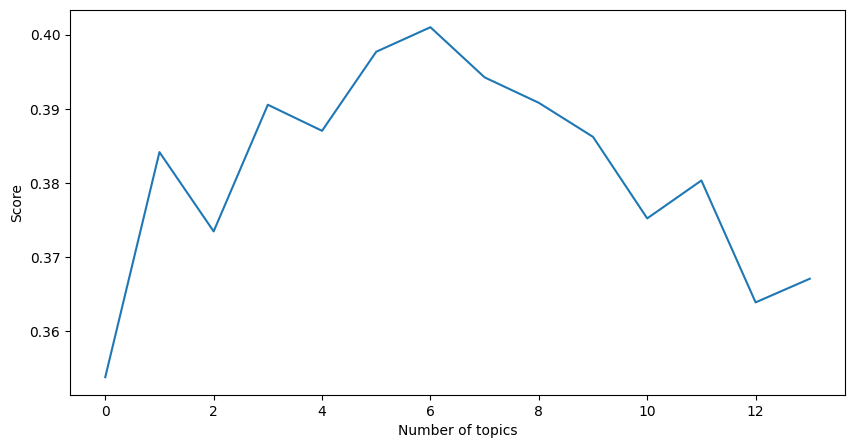

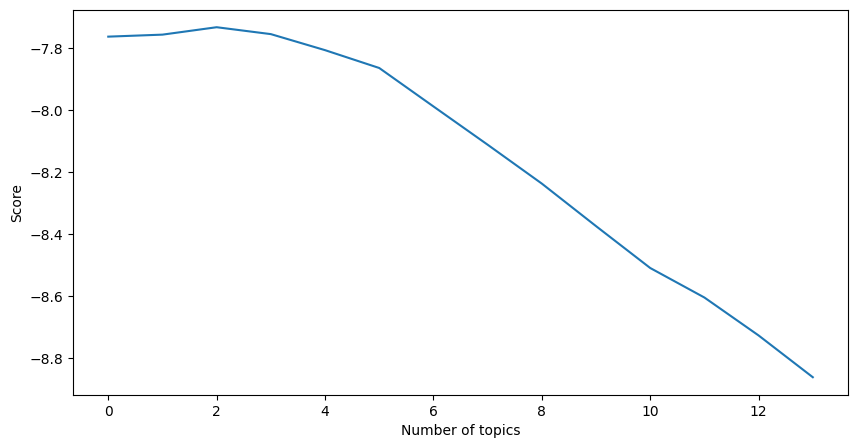

In [67]:
# create a lineplot from results['coherence'] and results['perplexity']
plt.figure(figsize=(10, 5))
plt.plot(results['coherence'], label='Coherence')
plt.xlabel('Number of topics')
plt.ylabel('Score')

plt.figure(figsize=(10, 5))
plt.plot(results['perplexity'], label='Perplexity')
plt.xlabel('Number of topics')
plt.ylabel('Score')



## Iteration 6
#### Brams iteration 4

In [68]:
# drop the following 
words_to_filter = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']

# drop the words from the corpus
text = text.apply(lambda x: [word for word in x if word not in words_to_filter])

# create dictionary
id2word = corpora.Dictionary(text)

In [70]:
# Build LDA model
lda_model4 = LdaModel(corpus=corpus, 
                     id2word=id2word, 
                     num_topics=40, 
                     random_state=2065721, 
                     passes=5, 
                     alpha='auto', 
                     per_word_topics=True,
                     update_every=1)


# get the perplexity score
print('\nPerplexity: ', lda_model4.log_perplexity(corpus))

# get the coherence score
coherence_model_lda = CoherenceModel(model=lda_model4, texts=text, dictionary=id2word, coherence='c_v')
print('\nCoherence Score: ', coherence_model_lda.get_coherence())



Perplexity:  -7.612378806950247

Coherence Score:  0.5055407791019899


## Iteration 7
#### Brams iteration 5